## **Fundamentos de Data Science**

### **Requisitos**

Limpiar y explorar un dataset que contiene información sobre las ventas de videojuegos en el año 2024. Este análisis es crucial para entender las tendencias de mercado y los factores que influyen en las ventas de videojuegos.

### **Limpieza de datos con Python:**
- **Detección y eliminación de valores duplicados:** Asegúrate de que cada registro en el dataset sea único.

- **Verificación y ajuste de tipos de datos:** Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

- **Consistencia en valores categóricos:** Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Action’, ‘action’, ‘ACTION’).

- **Manejo de valores faltantes:** Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

- **Detección de datos anómalos:** Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).

### **Exploración de Datos con Python:**
- **Visualizaciones exploratorias univariadas:** Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

- **Visualizaciones exploratorias multivariadas:** Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

### **Análisis adicional:**

- **Estadísticas descriptivas:** Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

- **Identificación de tendencias:** Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

- **Análisis de correlación:** Identifica y analiza las correlaciones más fuertes entre las variables del dataset.

- **Predicción de ventas:** Utiliza un modelo de regresión simple para predecir las ventas futuras basadas en los datos disponibles.




In [16]:
import pandas as pd

# Cargar el dataset
file_path = 'C:\\Users\\Andy\\Documents\\Examen\\Data\\vgchartz-2024.csv'
df = pd.read_csv(file_path)

# Descripción del dataset
num_filas = df.shape[0]
num_columnas = df.shape[1]
tipos_de_datos = df.dtypes

print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")
print(f"Tipos de datos:\n{tipos_de_datos}")

# Mostrar las primeras 10 filas del dataset
print("Primeras 10 filas:")
print(df.head(10))

Número de filas: 64016
Número de columnas: 14
Tipos de datos:
img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object
Primeras 10 filas:
                                                 img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
5  /games/boxart/full_call-of-duty-modern-warfare...   
6  /games/boxart/full_call-of-duty-black-ops_5Ame...   
7      /games/boxart/full_4653215AmericaFrontccc.jpg   
8      /games/boxart/full_1977964AmericaFrontccc.jpg   
9      /g

In [24]:
# LIMPIEZA DE DATOS


# 1. Detección y eliminación de valores duplicados
df_limpio = df.drop_duplicates(subset=['title', 'console', 'genre', 'publisher', 'developer', 'release_date'])


# 2. Verificación y ajuste de tipos de datos usando loc para evitar warnings
df_limpio.loc[:, 'release_date'] = pd.to_datetime(df_limpio['release_date'], errors='coerce')
df_limpio.loc[:, 'last_update'] = pd.to_datetime(df_limpio['last_update'], errors='coerce')


# 3. Consistencia en valores categóricos usando loc para evitar warnings
df_limpio.loc[:, 'genre'] = df_limpio['genre'].str.capitalize()  # Capitalizar géneros
df_limpio.loc[:, 'console'] = df_limpio['console'].str.upper()   # Convertir consolas a mayúsculas


# 4. Manejo de valores faltantes: Asignar 0 a las columnas de ventas
# La falta de datos puede ser interpretada como "sin ventas", por lo que 0 es una suposición válida.
df_limpio.loc[:, ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']] = df_limpio[
    ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].fillna(0)


# 5. Calcular el total de ventas sumando las ventas regionales y asignarlo a 'total_sales'
df_limpio.loc[:, 'total_sales'] = df_limpio[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum(axis=1)


# 6. No se imputaron valores faltantes en 'critic_score' dado que la proporción de datos faltantes es muy superior a la de los datos existentes.


# Verificar si hay más valores faltantes en el dataset
# No se modifican los valores faltantes que no fueran relevantes para los análisis siguientes
missing_values_post = df_limpio.isnull().sum()

print("Valores faltantes después de la corrección:") 
print(missing_values_post[missing_values_post > 0])


# 7. Detección de anomalías

# 7.1. Números negativos en las ventas: no deberían ser negativos
negative_sales = df_limpio[
    (df_limpio['total_sales'] < 0) | 
    (df_limpio['na_sales'] < 0) | 
    (df_limpio['jp_sales'] < 0) | 
    (df_limpio['pal_sales'] < 0) | 
    (df_limpio['other_sales'] < 0)
]

# Convertir los valores negativos a positivos utilizando abs() (valor absoluto)
df_limpio.loc[:, ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']] = df_limpio[
    ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].abs()

# 7.2. Puntuaciones de críticos mayores a 10
if 'critic_score' in df_limpio.columns:
    high_critic_scores = df_limpio[df_limpio['critic_score'] > 10]
    # Corregir puntuaciones mayores a 10, limitando el valor máximo a 10
    df_limpio.loc[df_limpio['critic_score'] > 10, 'critic_score'] = 10

# 7.3. Fechas fuera de rango
# Filtrar juegos con fechas de lanzamiento futuras o demasiado antiguas
future_games = df_limpio[df_limpio['release_date'] > pd.to_datetime('2024-12-31')]
past_games = df_limpio[df_limpio['release_date'] < pd.to_datetime('1970-01-01')]

# Mostrar anomalías encontradas
sales_inconsistency = df_limpio[
    df_limpio['total_sales'] != df_limpio[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum(axis=1)
]

print({
    "negative_sales": negative_sales.shape[0],
    "high_critic_scores": high_critic_scores.shape[0] if 'critic_score' in df_limpio.columns else 0,
    "future_games": future_games.shape[0],
    "past_games": past_games.shape[0],
})

Valores faltantes después de la corrección:
developer          17
critic_score    57279
release_date     7051
last_update     46081
dtype: int64
{'negative_sales': 0, 'high_critic_scores': 0, 'future_games': 0, 'past_games': 0}


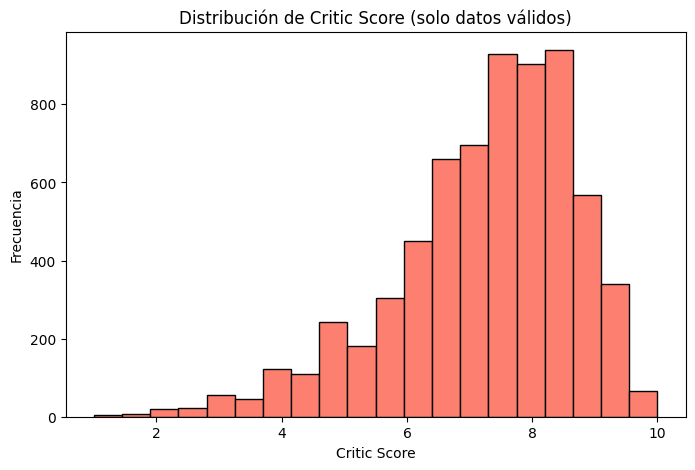

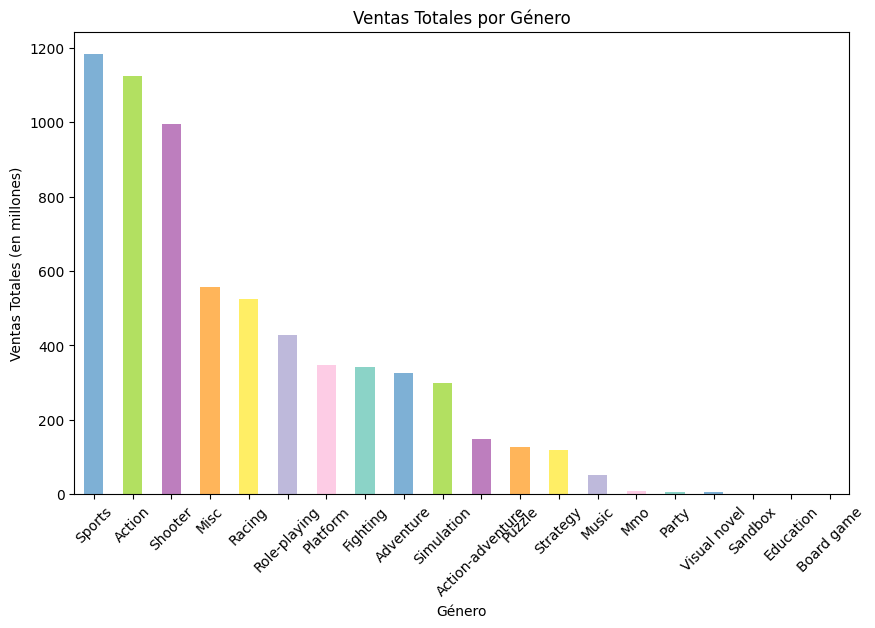

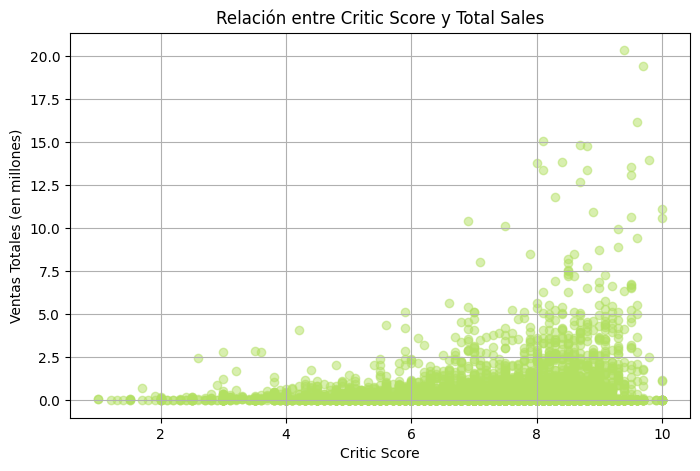

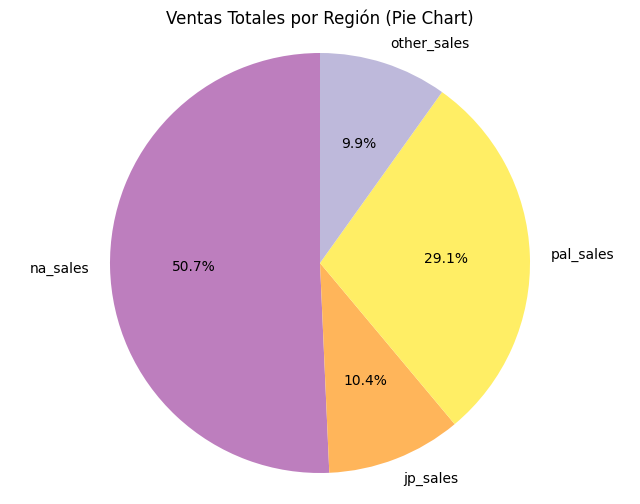

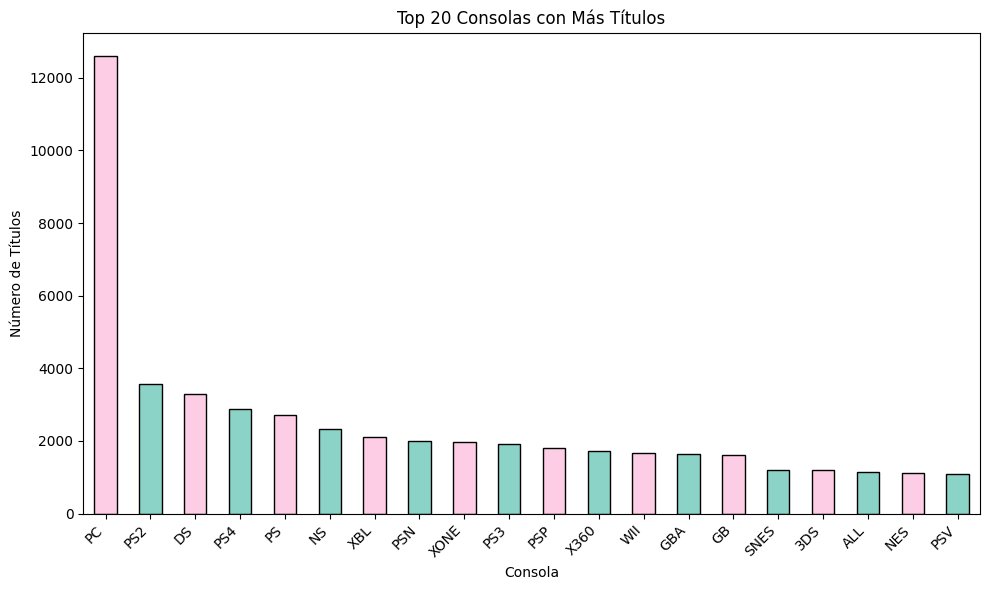

In [36]:
# EXPLORACIÓN DE DATOS

import matplotlib.pyplot as plt
import seaborn as sns

# Definir una paleta de colores
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# Aplicar la paleta de colores a Seaborn para usarla en gráficos
sns.set_palette(sns.color_palette(colors))

# Filtrar las filas donde 'critic_score' no es nulo
df_valid_critic = df_limpio[df_limpio['critic_score'].notnull()]


# 1. Visualizaciones Univariadas

# a. Histograma de 'critic_score' (solo con datos válidos)
plt.figure(figsize=(8, 5))
df_valid_critic['critic_score'].hist(bins=20, edgecolor='black', color=colors[0])
plt.title('Distribución de Critic Score (solo datos válidos)')
plt.xlabel('Critic Score')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

# Interpretación:
# La mayoría de los juegos tienen una puntuación crítica entre 7 y 10, con menos juegos puntuados por debajo de 5.


# 2. Gráfico de barras de ventas por género
plt.figure(figsize=(10, 6))
df_limpio.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', color=colors[1:])  # Usar múltiples colores de la paleta
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.show()

# Interpretación:
# Los géneros Shooter y Action dominan las ventas totales, mientras que otros géneros tienen ventas significativamente más bajas.


# 3. Visualizaciones Multivariadas

# a. Gráfico de dispersión entre 'critic_score' y 'total_sales'
plt.figure(figsize=(8, 5))
plt.scatter(df_limpio['critic_score'], df_limpio['total_sales'], alpha=0.5, color=colors[2])  # Usando el tercer color de la lista
plt.title('Relación entre Critic Score y Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)
plt.show()

# Interpretación:
# No se observa una correlación fuerte entre las puntuaciones de los críticos y las ventas. Algunos juegos con puntuaciones bajas tienen ventas altas.


# 4. Gráfico de ventas por región (pie chart)
ventas_regiones = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
ventas_totales_por_region = df_limpio[ventas_regiones].sum()

plt.figure(figsize=(8, 6))
plt.pie(ventas_totales_por_region, labels=ventas_regiones, autopct='%1.1f%%', colors=colors[3:7], startangle=90)
plt.title('Ventas Totales por Región (Pie Chart)')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

# Interpretación:
# El pie chart muestra la proporción de ventas por región. Norteamérica tiene la mayor participación, seguida de PAL y Japón.


# 5. Gráfico de las 20 consolas con más títulos, con la nueva paleta de colores
plt.figure(figsize=(10, 6))
df_limpio['console'].value_counts().head(20).plot(kind='bar', color=colors[7:], edgecolor='black')
plt.title('Top 20 Consolas con Más Títulos')
plt.xlabel('Consola')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas y alinearlas a la derecha
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.show()

# Interpretación:
# Las consolas más populares tienen un número mucho mayor de títulos en comparación con el resto.


Estadísticas descriptivas:
       critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count   3961.000000  17489.000000  17489.000000  17489.000000  17489.000000   
mean       7.108861      0.377156      0.191242      0.039125      0.109567   
std        1.432283      0.833530      0.436972      0.114716      0.342663   
min        1.000000      0.010000      0.000000      0.000000      0.000000   
25%        6.300000      0.050000      0.000000      0.000000      0.000000   
50%        7.300000      0.140000      0.060000      0.000000      0.020000   
75%        8.100000      0.380000      0.190000      0.020000      0.080000   
max       10.000000     20.330000      9.760000      2.130000      9.850000   

        other_sales  
count  17489.000000  
mean       0.037222  
std        0.118699  
min        0.000000  
25%        0.000000  
50%        0.010000  
75%        0.030000  
max        3.120000  

Matriz de correlación:
              total_sales  critic_scor

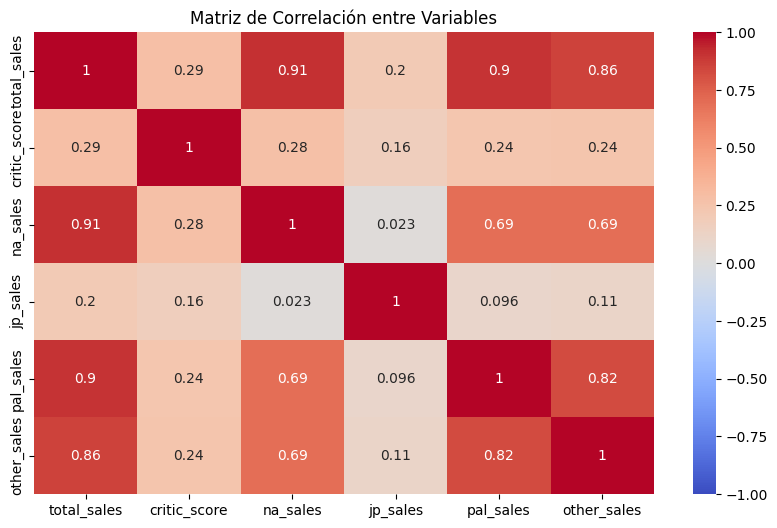


Interpretación del Heatmap de Correlaciones:
Las ventas totales están fuertemente correlacionadas con las ventas en todas las regiones, especialmente en Norteamérica (0.91) y la región PAL (0.9).
Sin embargo, la correlación entre las puntuaciones de los críticos y las ventas totales es baja (0.29), lo que sugiere que las puntuaciones no son un gran predictor de las ventas.
Además, la correlación entre las ventas en Japón y las ventas en otras regiones es mucho más baja que en otros casos, lo que indica que las ventas en Japón no siguen necesariamente las mismas tendencias globales.

Error Cuadrático Medio (MSE): 1.8743988658578714
Coeficiente de Determinación (R²): 0.08268835610835368


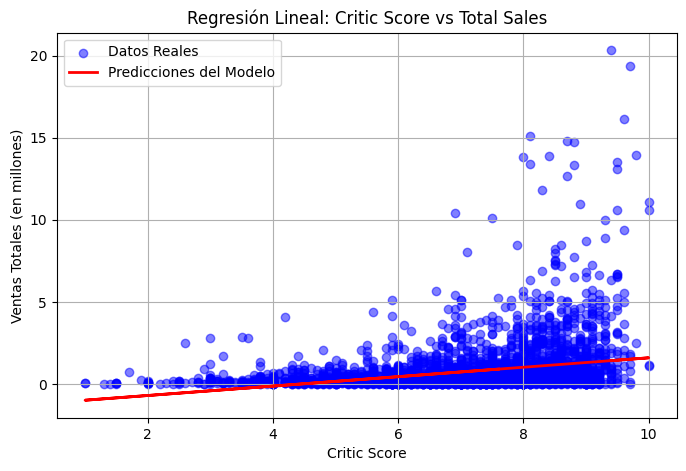


Interpretación del modelo Critic Score vs Total Sales:
El modelo muestra un R² bajo, lo que indica una baja correlación entre el critic score y las ventas totales.
Además, la mayoría de los títulos carecen de critic score, por lo que los resultados no son muy representativos.
El MSE es relativamente alto, lo que significa que las predicciones se desvían significativamente de los valores reales.

Error Cuadrático Medio (MSE): 0.6740120144225418
Coeficiente de Determinación (R²): 0.029826105377255052


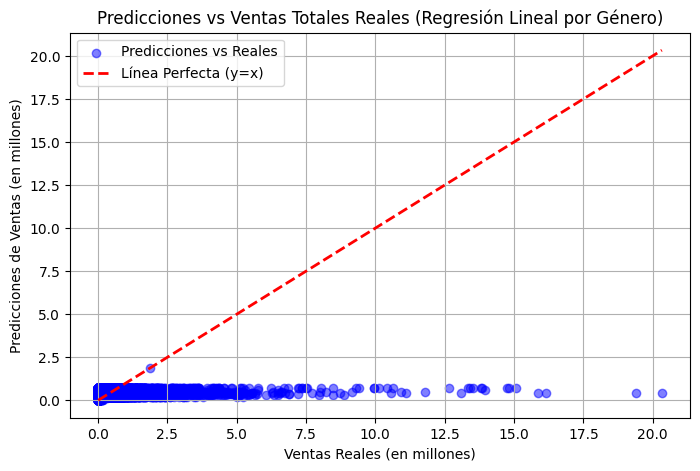


Interpretación del modelo por Género vs Total Sales:
El modelo tiene un R² bajo (~0.03), lo que indica que el género no es un buen predictor de las ventas totales.
El MSE es relativamente alto, lo que indica que las predicciones no son precisas para ventas de diferentes géneros.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
sns.set_palette(sns.color_palette(colors))

# ANÁLISIS ADICIONAL

# 1. Estadísticas descriptivas para las variables numéricas
print("\nEstadísticas descriptivas:")
estadisticas_descriptivas = df_limpio.describe()
print(estadisticas_descriptivas)


# 2. Análisis de Correlación: Matriz de correlación y Heatmap
print("\nMatriz de correlación:")
correlacion = df_limpio[['total_sales', 'critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr()
print(correlacion)

# Heatmap para visualizar las correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables')
plt.show()

# Interpretación del Heatmap de Correlaciones
print("\nInterpretación del Heatmap de Correlaciones:")
print("Las ventas totales están fuertemente correlacionadas con las ventas en todas las regiones, especialmente en Norteamérica (0.91) y la región PAL (0.9).")
print("Sin embargo, la correlación entre las puntuaciones de los críticos y las ventas totales es baja (0.29), lo que sugiere que las puntuaciones no son un gran predictor de las ventas.")
print("Además, la correlación entre las ventas en Japón y las ventas en otras regiones es mucho más baja que en otros casos, lo que indica que las ventas en Japón no siguen necesariamente las mismas tendencias globales.")


# PREDICCIÓN DE VENTAS CON REGRESIÓN LINEAL POR CRITIC SCORE


# Fórmulas básicas para calcular la regresión lineal
# La fórmula de la pendiente (m) y la intersección (b) son:
# m = Σ((x_i - mean(x)) * (y_i - mean(y))) / Σ((x_i - mean(x))^2)
# b = mean(y) - m * mean(x)

# 3. Preparar los datos para el modelo de regresión
X = df_limpio[['critic_score']].dropna().to_numpy().flatten()  # Convertir a array unidimensional
y = df_limpio.loc[df_limpio['critic_score'].notnull(), 'total_sales'].to_numpy()

# Cálculos de la regresión lineal simple
x_mean = np.mean(X)
y_mean = np.mean(y)

# Calcular la pendiente (m) y la intersección (b)
m = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean)**2)
b = y_mean - m * x_mean

# Predicciones usando la ecuación de la recta: y = mx + b
y_pred = m * X + b

# Evaluación del modelo: Error Cuadrático Medio (MSE)
mse = np.mean((y - y_pred)**2)
print(f"\nError Cuadrático Medio (MSE): {mse}")

# Coeficiente de Determinación (R²)
ss_total = np.sum((y - y_mean)**2)
ss_res = np.sum((y - y_pred)**2)
r2 = 1 - (ss_res / ss_total)
print(f"Coeficiente de Determinación (R²): {r2}")

# Visualización del ajuste del modelo
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos Reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicciones del Modelo')
plt.title('Regresión Lineal: Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Totales (en millones)')
plt.legend()
plt.grid(True)
plt.show()

# Interpretación del gráfico y el modelo
print("\nInterpretación del modelo Critic Score vs Total Sales:")
print("El modelo muestra un R² bajo, lo que indica una baja correlación entre el critic score y las ventas totales.")
print("Además, la mayoría de los títulos carecen de critic score, por lo que los resultados no son muy representativos.")
print("El MSE es relativamente alto, lo que significa que las predicciones se desvían significativamente de los valores reales.")

# PREDICCIÓN DE VENTAS CON REGRESION LINEAL POR GÉNERO

# Preparar los datos para el modelo de regresión
# Usamos 'genre' como variable independiente (convertida a variables dummy)
df_limpio = df_limpio[df_limpio['total_sales'] > 0]  # Filtramos para mantener solo las filas con ventas
X = pd.get_dummies(df_limpio['genre'], drop_first=True)  # Convertimos 'genre' a variables dummy
y = df_limpio['total_sales'].to_numpy()  # Variable dependiente: ventas totales

# Ajustar el modelo de regresión lineal manualmente
# La fórmula de la pendiente (m) y la intersección (b) para cada variable dummy se calculará para cada columna en X.

# Cálculos de la regresión lineal simple
X = X.to_numpy()  # Convertir a array numpy

# Matriz de diseño con un intercepto
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Añadir columna de unos para el término independiente

# Calcular los coeficientes de la regresión: (X'X)^-1 X'y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predicciones usando el modelo
y_pred = X_b.dot(theta_best)

# Evaluación del modelo: Error Cuadrático Medio (MSE)
mse = np.mean((y - y_pred)**2)
print(f"\nError Cuadrático Medio (MSE): {mse}")

# Coeficiente de Determinación (R²)
ss_total = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred)**2)
r2 = 1 - (ss_res / ss_total)
print(f"Coeficiente de Determinación (R²): {r2}")

# Visualización del ajuste del modelo
# Como estamos utilizando múltiples variables dummy, no es posible hacer un gráfico de dispersión en 2D simple.
# En su lugar, mostraremos un gráfico de las predicciones vs los valores reales.

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, color='blue', alpha=0.5, label='Predicciones vs Reales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea Perfecta (y=x)')
plt.title('Predicciones vs Ventas Totales Reales (Regresión Lineal por Género)')
plt.xlabel('Ventas Reales (en millones)')
plt.ylabel('Predicciones de Ventas (en millones)')
plt.legend()
plt.grid(True)
plt.show()

# Interpretación del gráfico y el modelo
print("\nInterpretación del modelo por Género vs Total Sales:")
print("El modelo tiene un R² bajo (~0.03), lo que indica que el género no es un buen predictor de las ventas totales.")
print("El MSE es relativamente alto, lo que indica que las predicciones no son precisas para ventas de diferentes géneros.")

In [44]:
# OTRAS ESTADÍSTICAS INTERESANTES

# 1. Juego más vendido y menos vendido
# Aseguramos que el dataset tenga ventas > 0 para encontrar el juego menos vendido
juego_mas_vendido = df_limpio.loc[df_limpio['total_sales'].idxmax()]
juego_menos_vendido = df_limpio[df_limpio['total_sales'] > 0].loc[df_limpio[df_limpio['total_sales'] > 0]['total_sales'].idxmin()]
print(f"\nEl juego más vendido es '{juego_mas_vendido['title']}' con {juego_mas_vendido['total_sales']} millones de ventas.")
print(f"El juego menos vendido es '{juego_menos_vendido['title']}' con {juego_menos_vendido['total_sales']} millones de ventas.")

# 2. Género más popular en ventas
genero_mas_vendido = df_limpio.groupby('genre')['total_sales'].sum().idxmax()
ventas_genero_mas_vendido = df_limpio.groupby('genre')['total_sales'].sum().max()
print(f"\nEl género más popular en ventas es {genero_mas_vendido} con un total de {ventas_genero_mas_vendido} millones de ventas.")

# 3. Consola con más títulos lanzados
consola_mas_titulos = df_limpio['console'].value_counts().idxmax()
cantidad_titulos_consola = df_limpio['console'].value_counts().max()
print(f"\nLa consola con más títulos es {consola_mas_titulos} con un total de {cantidad_titulos_consola} títulos.")

# 4. Región con más ventas de videojuegos
ventas_regiones = df_limpio[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()
region_mas_ventas = ventas_regiones.idxmax()
print(f"\nLa región con más ventas es {region_mas_ventas} con un total de {ventas_regiones.max()} millones de unidades vendidas.")

# 5. Distribución de las puntuaciones de críticos (critic_score)
media_critic_score = df_limpio['critic_score'].mean()
mediana_critic_score = df_limpio['critic_score'].median()
print(f"\nLa media de las puntuaciones de críticos es {media_critic_score}, y la mediana es {mediana_critic_score}.")

# 6. Juegos con más de 1 millón y menos de 1 millón de ventas
juegos_mas_1millon = df_limpio[df_limpio['total_sales'] > 1].shape[0]
juegos_menos_1millon = df_limpio[df_limpio['total_sales'] <= 1].shape[0]
print(f"\nJuegos con más de 1 millón de ventas: {juegos_mas_1millon}")
print(f"Juegos con menos de 1 millón de ventas: {juegos_menos_1millon}")

# 7. Juego mejor puntuado por críticos
mejor_puntuado = df_limpio.loc[df_limpio['critic_score'].idxmax()]
print(f"\nEl juego mejor puntuado es '{mejor_puntuado['title']}' con un puntaje de {mejor_puntuado['critic_score']}.")

# 8. Distribución de las ventas por región
print("\nDistribución de ventas por región:")
print(f"Ventas en Norteamérica: {ventas_regiones['na_sales']} millones")
print(f"Ventas en Japón: {ventas_regiones['jp_sales']} millones")
print(f"Ventas en la región PAL: {ventas_regiones['pal_sales']} millones")
print(f"Ventas en Otras regiones: {ventas_regiones['other_sales']} millones")

# 9. Juegos más populares por ventas
print("\nTop 5 juegos más populares por ventas:")
top_5_ventas = df_limpio.sort_values('total_sales', ascending=False).head(5)
for idx, row in top_5_ventas.iterrows():
    print(f"{row['title']} - {row['total_sales']} millones de ventas")

# 10. Juegos más populares por puntaje
print("\nTop 5 juegos más populares por puntaje de críticos:")
top_5_critic = df_limpio.sort_values('critic_score', ascending=False).head(5)
for idx, row in top_5_critic.iterrows():
    print(f"{row['title']} - Puntaje: {row['critic_score']}")


El juego más vendido es 'Grand Theft Auto V' con 20.330000000000002 millones de ventas.
El juego menos vendido es 'Red Dead Redemption: Game of the Year Edition' con 0.01 millones de ventas.

El género más popular en ventas es Sports con un total de 1183.28 millones de ventas.

La consola con más títulos es DS con un total de 2140 títulos.

La región con más ventas es na_sales con un total de 3344.63 millones de unidades vendidas.

La media de las puntuaciones de críticos es 7.108861398636708, y la mediana es 7.3.

Juegos con más de 1 millón de ventas: 1484
Juegos con menos de 1 millón de ventas: 16005

El juego mejor puntuado es 'Grand Theft Auto IV' con un puntaje de 10.0.

Distribución de ventas por región:
Ventas en Norteamérica: 3344.63 millones
Ventas en Japón: 684.2600000000001 millones
Ventas en la región PAL: 1916.2100000000003 millones
Ventas en Otras regiones: 650.98 millones

Top 5 juegos más populares por ventas:
Grand Theft Auto V - 20.330000000000002 millones de ventas
